In [4]:
import numpy as np
import msprime
import matplotlib.pyplot as plt
%matplotlib inline


def pois_process(lambdao, nu_1, random_state=None):
    
    """
    Return waiting time for poisson process with intensity lamdao
    
    Parameters
    ----------
    lambdao, int: intensity of Poisson process
    nu_1, int: maximum number of changes in population 
    
    Return
    ------
    event_time, list: Time at which event occured on linear scale
    exp_time, list : Time at which event occured on exponential scale
    """
    
    
    #mutation_rate = np.random.uniform(mu_0, mu_1)
    #recombination_rate = np.random.uniform(rho_0, rho_1)
    # N_i = np.random.uniform(n_0, n_1)    # population size
    
    nu = int(np.random.uniform(0, nu_1))  # number of demographic events ((how many times population changed))
    waiting_times = []                    # waiting times before occurence of next event 
    event_times = []                      # time when next event occurs
    event_time = 0
    event_num = []
    


    for i in range(nu):
        
        p = np.random.random()                      # probability that the time between consecutive 
                                                    # population size changes <= waiting_time
        event_num.append(i)

        # Generate the waiting time from the exp distribution's CDF using the Inverse-CDF technique
        waiting_time = -np.log(1.0 - p) / lambdao
        waiting_times.append(waiting_time)  
    
        event_time += waiting_time
        event_times.append(event_time)
        
        exp_time = [np.exp(event_times[i]) - 1 for i in range(len(event_times))]
        
        
        
        
#     demographic_events = [
#         msprime.PopulationParametersChange(
#             time=? , initial_size=? , growth_rate=0, population_id=1)   
#     ]
                
        
    # Plot waiting times
    fig = plt.figure()
    fig.suptitle('Times between consecutive events in a simulated Poisson process')
    plot, = plt.plot(event_num, waiting_times, 'bo-', label='Waiting time')
    plt.legend(handles=[plot])
    plt.xlabel('Index of event')
    plt.ylabel('Time')
    plt.show()
    
    # plot the absolute event times
    fig = plt.figure()
    fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
    plot, = plt.plot(event_num, event_times, 'bo-', label='Absolute time of event')
    plt.legend(handles=[plot])
    plt.xlabel('Index of event')
    plt.ylabel('Time')
    plt.show()
    
    # plot the absolute event times
    fig = plt.figure()
    fig.suptitle('Exponential times of consecutive events in a simulated Poisson process')
    plot, = plt.plot(event_num, exp_time, 'bo-', label='Exponential time of event', )
    plt.yscale('log')
    plt.legend(handles=[plot])
    plt.xlabel('Index of event')
    plt.ylabel('Time')
    plt.show()
    
    return event_times, exp_time

In [ ]:
#     X_T = np.random.poisson(lambdao, size=nu)  # Initiate a Poisson process with intensity `lambdao`
#     S = [np.sum(X_T[0:i]) for i in range(nu)]

# Plot the graph of Poisson process
graphs = plt.step(np.linspace(0, nu, nu), S ,label="Lambda = %d"%lambdao)
plt.legend(handles=graphs, loc=2)
plt.title("Poisson Process", fontdict={'fontname': 'Times New Roman', 'fontsize': 21}, y=1.03)
plt.ylim(0)
plt.xlim(0)
plt.show()

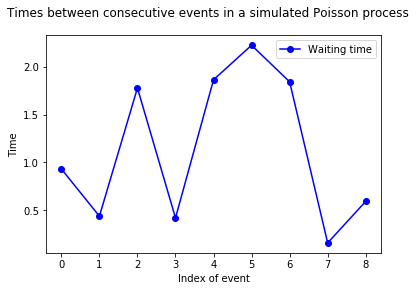

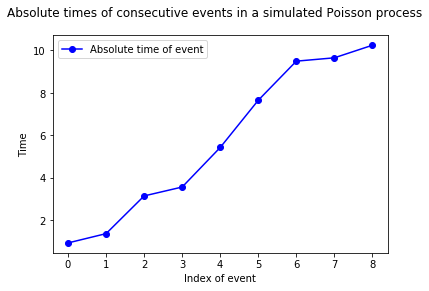

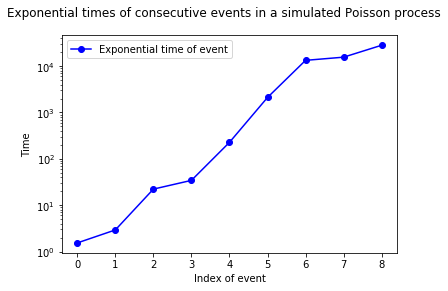

In [5]:
normal_time, ex_time = pois_process(1,10)

In [6]:
normal_time

[0.9312997529692434,
 1.3685993649312342,
 3.1459477254583055,
 3.5647250513517714,
 5.42873733561954,
 7.65355671582615,
 9.495876334394525,
 9.653511740623005,
 10.24573559228027]

In [7]:
ex_time

[1.5378055552212637,
 2.9298425636202996,
 22.24169178192418,
 34.32973820498871,
 226.86135129345993,
 2107.1302914219686,
 13303.749216188822,
 15575.392420004624,
 28161.19042654029]